In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clinical_csvpath = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_csvpath = os.path.join('raw_data', 'mouse_drug_data.csv')
clinical_data = pd.read_csv(clinical_csvpath)
mouse_data = pd.read_csv(mouse_csvpath)
#clinical_data.head()

In [3]:
#mouse_data.head()

In [4]:
merged_data = pd.merge(clinical_data, mouse_data, on=['Mouse ID'])
merged_data = merged_data.set_index(['Drug'])
control_data = merged_data.loc['Placebo']
control_data = control_data.groupby(['Drug','Timepoint']).mean()
pd.set_option('display.max_rows', 500)
control_data

Tumor Volume (mm3)  Metastatic Sites
Drug    Timepoint                                      
Placebo 0                   45.000000          0.000000
        5                   47.125589          0.375000
        10                  49.423329          0.833333
        15                  51.359742          1.250000
        20                  54.364417          1.526316
        25                  57.482574          1.941176
        30                  59.809063          2.266667
        35                  62.420615          2.642857
        40                  65.052675          3.166667
        45                  68.084082          3.272727

In [5]:
new_merged_data = merged_data.groupby(['Drug', 'Timepoint']).mean()
#new_merged_data

In [6]:
new_merged_data['Growth Inhibition'] = 1.0 - (new_merged_data['Tumor Volume (mm3)']/control_data.loc['Placebo', 
                                                                                                  'Tumor Volume (mm3)'])

new_merged_data['Metastic Inhibition'] = 1.0 - (new_merged_data['Metastatic Sites']/control_data.loc['Placebo', 
                                                                                                     'Metastatic Sites'])
new_merged_data = new_merged_data.fillna(0)
new_merged_data

Tumor Volume (mm3)  Metastatic Sites  Growth Inhibition  \
Drug      Timepoint                                                            
Capomulin 0                   45.000000          0.000000           0.000000   
          5                   44.266086          0.160000           0.060678   
          10                  43.084291          0.320000           0.128260   
          15                  42.064317          0.375000           0.180987   
          20                  40.716325          0.652174           0.251048   
          25                  39.939528          0.818182           0.305189   
          30                  38.769339          1.090909           0.351782   
          35                  37.816839          1.181818           0.394161   
          40                  36.958001          1.380952           0.431876   
          45                  36.236114          1.476190           0.467774   
Ceftamin  0                   45.000000          0.000000           0.000000   
          5                   46.503051          0.380952           0.013210   
          10                  48.285125          0.600000           0.023030   
          15                  50.094055          0.789474           0.024644   
          20                  52.157049          1.111111           0.040603   
          25                  54.287674          1.500000           0.055580   
          30                  56.769517          1.937500           0.050821   
          35                  58.827548          2.071429           0.057562   
          40                  61.467895          2.357143           0.055106   
          45                  64.132421          2.692308           0.058041   
Infubinol 0                   45.000000          0.000000           0.000000   
          5                   47.062001          0.280000           0.001349   
          10                  49.403909          0.666667           0.000393   
          15                  51.296397          0.904762           0.001233   
          20                  53.197691          1.050000           0.021461   
          25                  55.715252          1.277778           0.030745   
          30                  58.299397          1.588235           0.025241   
          35                  60.742461          1.666667           0.026885   
          40                  63.162824          2.100000           0.029051   
          45                  65.755562          2.111111           0.034201   
Ketapril  0                   45.000000          0.000000           0.000000   
          5                   47.389175          0.304348          -0.005593   
          10                  49.582269          0.590909          -0.003216   
          15                  52.399974          0.842105          -0.020254   
          20                  54.920935          1.210526          -0.010237   
          25                  57.678982          1.631579          -0.003417   
          30                  60.994507          2.055556          -0.019820   
          35                  63.371686          2.294118          -0.015236   
          40                  66.068580          2.733333          -0.015617   
          45                  70.662958          3.363636          -0.037878   
Naftisol  0                   45.000000          0.000000           0.000000   
          5                   46.796098          0.260870           0.006992   
          10                  48.694210          0.523810           0.014753   
          15                  50.933018          0.857143           0.008309   
          20                  53.644087          1.150000           0.013250   
          25                  56.731968          1.500000           0.013058   
          30                  59.559509          2.066667           0.004173   
          35                  62.685087          2.266667          -0.004237   
          40         

In [7]:
tumor_data = new_merged_data[['Tumor Volume (mm3)']]
tumor_data

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Naftisol  0                   45.000000
          5                   46.796098
          10                  48.694210
          15                  50.933018
          20                  53.644087
          25                  56.731968
          30                  59.559509
          35                  62.685087
          40                  65.600754
          45                  69.265506
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082
Propriva  0                   45.000000
          5                   47.248967
          10                  49.101541
          15                  51.067318
          20                  53.346737
          25                  55.504138
          30                  58.196374
          35                  60.350199
          40                  63.045537
          45                  66.258529
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40         

In [8]:
capo_data = tumor_data.loc['Capomulin']
capo_data = capo_data.rename(columns={'Tumor Volume (mm3)': 'Capomulin'})
capo_data = capo_data.reset_index()

In [9]:
placebo_data = tumor_data.loc['Placebo']
placebo_data = placebo_data.rename(columns={'Tumor Volume (mm3)': 'Placebo'})
placebo_data = placebo_data.reset_index()

In [10]:
CP_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
CP_merge.head()

,Timepoint,Placebo,Capomulin
0,0,45.000000,45.000000
1,5,47.125589,44.266086
2,10,49.423329,43.084291
3,15,51.359742,42.064317
4,20,54.364417,40.716325


In [11]:
infubinol_data = tumor_data.loc['Infubinol']
infubinol_data = infubinol_data.rename(columns={'Tumor Volume (mm3)': 'Infubinol'})
infubinol_data = infubinol_data.reset_index()

In [12]:
ketapril_data = tumor_data.loc['Ketapril']
ketapril_data = ketapril_data.rename(columns={'Tumor Volume (mm3)': 'Ketapril'})
ketapril_data = ketapril_data.reset_index()

In [13]:
K_I_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
K_I_merge.head()

,Timepoint,Infubinol,Ketapril
0,0,45.000000,45.000000
1,5,47.062001,47.389175
2,10,49.403909,49.582269
3,15,51.296397,52.399974
4,20,53.197691,54.920935


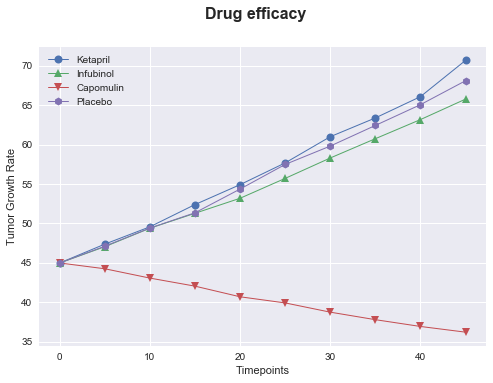

In [14]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Drug efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Tumor Growth Rate")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()

In [15]:
meta_data = new_merged_data[['Metastatic Sites']]

In [16]:
capo_data = meta_data.loc['Capomulin']
capo_data = capo_data.rename(columns={'Metastatic Sites': 'Capomulin'})
capo_data = capo_data.reset_index()
placebo_data = meta_data.loc['Placebo']
placebo_data = placebo_data.rename(columns={'Metastatic Sites': 'Placebo'})
placebo_data = placebo_data.reset_index()
CP_merge = pd.merge(placebo_data, capo_data, on="Timepoint")
CP_merge.head()

,Timepoint,Placebo,Capomulin
0,0,0.000000,0.000000
1,5,0.375000,0.160000
2,10,0.833333,0.320000
3,15,1.250000,0.375000
4,20,1.526316,0.652174


In [17]:
infubinol_data = meta_data.loc['Infubinol']
infubinol_data = infubinol_data.rename(columns={'Metastatic Sites': 'Infubinol'})
infubinol_data = infubinol_data.reset_index()
ketapril_data = meta_data.loc['Ketapril']
ketapril_data = ketapril_data.rename(columns={'Metastatic Sites': 'Ketapril'})
ketapril_data = ketapril_data.reset_index()
K_I_merge = pd.merge(infubinol_data, ketapril_data, on='Timepoint')
K_I_merge.head()

,Timepoint,Infubinol,Ketapril
0,0,0.000000,0.000000
1,5,0.280000,0.304348
2,10,0.666667,0.590909
3,15,0.904762,0.842105
4,20,1.050000,1.210526


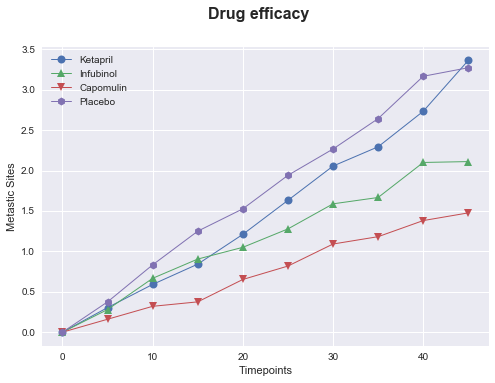

In [18]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Drug efficacy", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Ketapril'], linewidth=1, marker="o", markersize=8)
ax1.plot(K_I_merge['Timepoint'], K_I_merge['Infubinol'],linewidth=1, marker='^', markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Capomulin'], linewidth=1, marker="v", markersize=8)
ax1.plot(CP_merge['Timepoint'], CP_merge['Placebo'],linewidth=1, marker='h', markersize=8)
ax1.set_ylabel("Metastic Sites")
ax1.set_xlabel("Timepoints")
plt.legend()
plt.show()